# Movie Rating Prediction

Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Displaying Dataset

In [4]:
df = pd.read_csv("IMDb Movies India.csv" , encoding='latin1')
df.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
df.shape

(15509, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


---
Checking Null values

---

In [7]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [8]:
df['Director'].unique()

array(['J.S. Randhawa', 'Gaurav Bakshi', 'Soumyajit Majumdar', ...,
       'Mozez Singh', 'Ved Prakash', 'Kiran Thej'], dtype=object)

---
Droping unwanted columns because :


  *   They are High Cardinality Categorical Features
*   'Director', 'Actor 1', etc. often contain hundreds or thousands of unique names.



  *   The 'Name' Column is Often Just an Identifier




*   It's like an ID — it doesn't help the model generalize patterns.

  *   When to Keep It
*   Only if using NLP or title keywords
*   If using director-based popularity
---







In [9]:
drop = ['Director' , 'Actor 1' , 'Actor 2' , 'Actor 3' , 'Name']
df = df.drop(drop , axis=1)

In [10]:
df.head()

,Year,Duration,Genre,Rating,Votes
0,NaN,NaN,Drama,NaN,NaN
1,(2019),109 min,Drama,7.0,8
2,(2021),90 min,"Drama, Musical",NaN,NaN
3,(2019),110 min,"Comedy, Romance",4.4,35
4,(2010),105 min,Drama,NaN,NaN


---
* This code cleans and converts the Votes, Year, and Duration columns to numeric
format for modeling.

* Votes column: Removes special characters like $, ,, and M, then converts the values to numbers.

* Year column: Extracts numeric year values using a regular expression and converts them to numeric type.

* Duration column: Removes the text ' min' and converts the remaining values to numeric format.

* pd.to_numeric(..., errors='coerce') ensures any invalid entries are replaced with NaN.

* These steps help standardize the data for further analysis and machine learning.

---

In [11]:
df['Votes'] = df['Votes'].astype(str).str.replace(r'[$,M]', '', regex=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

df['Year'] = df['Year'].astype(str).str.extract(r'(\d+)')
df['Year'] = pd.to_numeric(df['Year'].squeeze(), errors='coerce')

df['Duration'] = df['Duration'].astype(str).str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')


Filling Null Values.

In [12]:
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])

In [13]:
df['Votes'] = df['Votes'].fillna(0).astype(int)
df['Votes'] = df['Votes'].astype(int)

In [14]:
df['Year'].nunique()

102

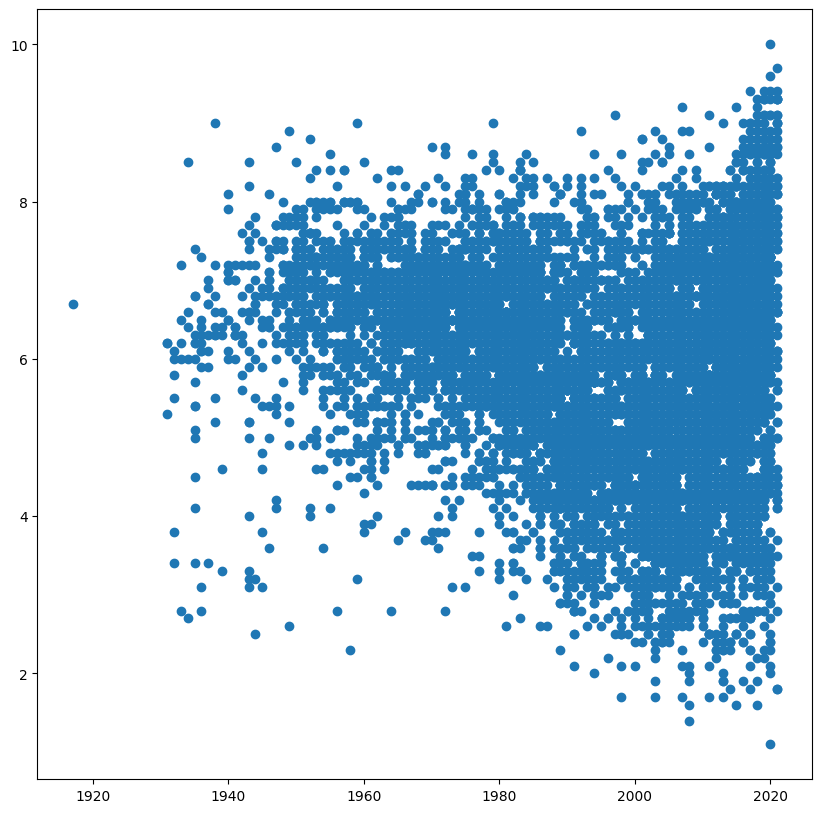

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(df['Year'] , df['Rating'])

In [16]:
df.isnull().sum()

,0
Year,528
Duration,8269
Genre,0
Rating,7590
Votes,0


In [17]:
df['Genre'].nunique()

485

Encoding Genre by using LabelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [19]:
df['Votes'].unique()

array([    0,     8,    35, ..., 70344,   408,  1496])

Checking Outliers

<Axes: >

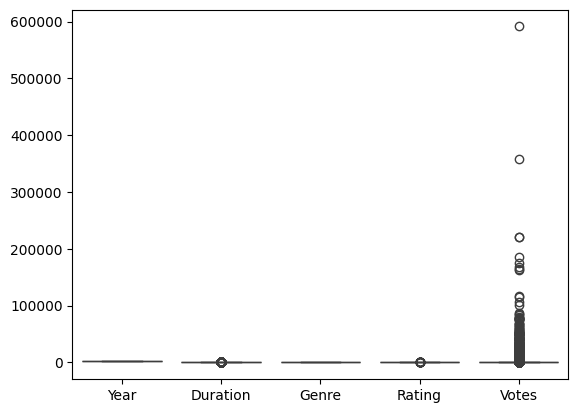

In [20]:
sns.boxplot(df)

Co-Relation between Attributes

<Axes: >

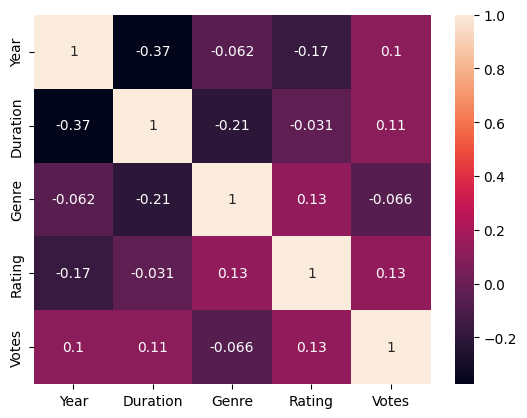

In [21]:
sns.heatmap(df.corr() , annot=True)

---
* Rows with missing Rating values are dropped, and input features are selected.

* Missing values in features are filled with the column-wise median.

*    The dataset is split into training and testing sets (80/20 split).

* A RandomForestRegressor is trained on the training data.

* Predictions are made on the test set, and performance is evaluated using Mean Squared Error (MSE) and R-squared (R²).

* MSE measures prediction error; R² indicates how well the model explains variance in ratings.

---

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_cleaned = df.dropna(subset=['Rating']).copy()

X = df_cleaned[['Year', 'Duration', 'Genre', 'Votes']]
y = df_cleaned['Rating']

X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.2867581312968364
R-squared: 0.30787645183413614


---
* The model achieved a Mean Squared Error of ~1.29, indicating the average squared difference between predicted and actual ratings.

* The R-squared value is ~0.31, meaning the model explains about 31% of the variance in movie ratings.

* This suggests the model captures some useful patterns, but there is still room for improvement by adding more relevant features or using advanced preprocessing techniques.

---